In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.feature_selection import chi2,SelectKBest

In [3]:
df_loan = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Loan_Dataset/loan_data_set.csv")

In [4]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Remove all null value
df_loan.dropna(inplace=True)
# drop the uninformative column("Loan_ID")
df_loan.drop(labels=["Loan_ID"],axis=1,inplace=True)
df_loan.reset_index(drop=True,inplace=True)

In [7]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [8]:
df_loan["Credit_History"]=df_loan["Credit_History"].apply(lambda x: "N" if x == 0 else "Y")

In [9]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Y,Urban,Y


In [10]:
df_loan1 = df_loan.copy()

In [11]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Y,Urban,Y


In [12]:
cat_cols = df_loan.select_dtypes(include= "object").columns
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
cat_col = df_loan.select_dtypes(include= "object").drop('Loan_Status', axis = 1).columns
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [14]:
df_loan[cat_cols] = df_loan[cat_cols].apply(lambda x:x.astype("category"))

In [15]:
df_loan[cat_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,Y,Urban,Y
3,Male,No,0,Graduate,No,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,Y,Urban,Y


In [16]:
df_loan["Property_Area"].unique()

['Rural', 'Urban', 'Semiurban']
Categories (3, object): ['Rural', 'Semiurban', 'Urban']

In [17]:
df_loan[cat_cols]=df_loan[cat_cols].apply(lambda x: x.cat.codes)

In [18]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int8   
 1   Married            480 non-null    int8   
 2   Dependents         480 non-null    int8   
 3   Education          480 non-null    int8   
 4   Self_Employed      480 non-null    int8   
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    int8   
 10  Property_Area      480 non-null    int8   
 11  Loan_Status        480 non-null    int8   
dtypes: float64(3), int64(1), int8(8)
memory usage: 18.9 KB


In [19]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1


In [20]:
X = df_loan[cat_col]
y = df_loan["Loan_Status"]

In [21]:
# Lets use the sklearn chi2 fnction
cs = SelectKBest(chi2,k=6)
cs.fit(X,y)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},index=X.columns)
feature_score.nlargest(n=6,columns="Score")

,Score,P_Value
Credit_History,19.617746,0.000009
Married,2.132101,0.144243
Education,1.793838,0.180459
Dependents,0.806228,0.369238
Self_Employed,0.498920,0.479975
Gender,0.357829,0.549714


Lets use the the getdummy encoding and use the chi2

In [22]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Y,Urban,Y


In [23]:
cat_col = df_loan1.select_dtypes(include="object").columns
cat_col = cat_col.drop("Loan_Status")
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [24]:
df_dummy = pd.get_dummies(df_loan1[cat_col])

In [25]:
df_dummy.head(10)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_N,Credit_History_Y,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
2,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
3,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
4,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1
5,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
6,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0
7,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
8,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0
9,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1


In [26]:
len(df_dummy.columns)

17

In [27]:
df_loan2 = pd.concat([df_dummy,df_loan1],axis=1)
df_loan2 = df_loan2.drop(columns=cat_col,axis=1)

In [28]:
df_loan2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Credit_History_N,Credit_History_Y,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,0,1,0,1,0,1,0,0,1,0,...,0,1,1,0,0,4583,1508.0,128.0,360.0,N
1,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,1,3000,0.0,66.0,360.0,Y
2,0,1,0,1,1,0,0,0,0,1,...,0,1,0,0,1,2583,2358.0,120.0,360.0,Y
3,0,1,1,0,1,0,0,0,1,0,...,0,1,0,0,1,6000,0.0,141.0,360.0,Y
4,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,1,5417,4196.0,267.0,360.0,Y


In [29]:
len(df_loan2.columns)

22

In [30]:
df_loan2["Loan_Status"] = df_loan2["Loan_Status"].replace({"N":0,"Y":1})

In [31]:
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [32]:
df_loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            480 non-null    uint8  
 1   Gender_Male              480 non-null    uint8  
 2   Married_No               480 non-null    uint8  
 3   Married_Yes              480 non-null    uint8  
 4   Dependents_0             480 non-null    uint8  
 5   Dependents_1             480 non-null    uint8  
 6   Dependents_2             480 non-null    uint8  
 7   Dependents_3+            480 non-null    uint8  
 8   Education_Graduate       480 non-null    uint8  
 9   Education_Not Graduate   480 non-null    uint8  
 10  Self_Employed_No         480 non-null    uint8  
 11  Self_Employed_Yes        480 non-null    uint8  
 12  Credit_History_N         480 non-null    uint8  
 13  Credit_History_Y         480 non-null    uint8  
 14  Property_Area_Rural      4

In [33]:
X_loan =  df_loan2.iloc[:,0:-1]
y_loan = df_loan2["Loan_Status"]

In [34]:
X_loan.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Credit_History_N,Credit_History_Y,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0,1,0,1,0,1,0,0,1,0,...,0,0,1,1,0,0,4583,1508.0,128.0,360.0
1,0,1,0,1,1,0,0,0,1,0,...,1,0,1,0,0,1,3000,0.0,66.0,360.0
2,0,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,1,2583,2358.0,120.0,360.0
3,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,6000,0.0,141.0,360.0
4,0,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,1,5417,4196.0,267.0,360.0


In [35]:
y_loan.head()

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [36]:
X_loan.shape,y_loan.shape

((480, 21), (480,))

In [37]:
# Apply sklearn ch2
chc=SelectKBest(score_func=chi2,k=21)
chc.fit(X_loan,y_loan)
features_score_pvalue=pd.DataFrame({"Score":chc.scores_,"P_Value":np.round(chc.pvalues_,3)},index=X_loan.columns)
features_score_pvalue.nlargest(n=21,columns="Score")

,Score,P_Value
ApplicantIncome,5342.194844,0.000
CoapplicantIncome,4988.307182,0.000
Credit_History_N,114.903940,0.000
LoanAmount,110.437160,0.000
Credit_History_Y,19.617746,0.000
Property_Area_Semiurban,7.004777,0.008
Property_Area_Rural,4.187629,0.041
Married_No,3.923570,0.048
Married_Yes,2.132101,0.144
Dependents_2,2.126247,0.145


Let's apply Logistic Regression without Feature Selection

In [38]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Y,Urban,Y


In [39]:
df_loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    object 
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 45.1+ KB


As we are using the dummy encoding so to avoid multicollinearity for Logistic Regression we will delete the drop_first while doing encoding

In [40]:
df_dummy1 = pd.get_dummies(df_loan1,columns=df_loan1.select_dtypes(
    exclude=["float64","int64"]).drop("Loan_Status",axis=1).columns,drop_first=True)

In [41]:
df_dummy1["Loan_Status"] = df_dummy1["Loan_Status"].apply(lambda x:0 if x=="N" else 1)
df_dummy1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Y,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,0,1,1,1,0,0,0,0,1,0,0
1,3000,0.0,66.0,360.0,1,1,1,0,0,0,0,1,1,0,1
2,2583,2358.0,120.0,360.0,1,1,1,0,0,0,1,0,1,0,1
3,6000,0.0,141.0,360.0,1,1,0,0,0,0,0,0,1,0,1
4,5417,4196.0,267.0,360.0,1,1,1,0,1,0,0,1,1,0,1


In [42]:
df_dummy1.Loan_Status.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [43]:
X_loan =  df_dummy1.drop("Loan_Status",axis=1)
y_loan = df_dummy1["Loan_Status"]

In [44]:
print(X_loan.shape)
print(y_loan.shape)
print(type(X_loan))
print(type(y_loan))

(480, 14)
(480,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [45]:
# Split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_loan,y_loan,test_size = 0.30,random_state = 42)

In [46]:
# Creating the prediction model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# Evaluate the metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score

In [48]:
pred = log_model.predict(X_test)
print("Accuracy_bae_model :",accuracy_score(y_test,pred))
print("Classification Report :")
print(classification_report(y_test,pred))

Accuracy_bae_model : 0.8055555555555556
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        44
           1       0.78      1.00      0.88       100

    accuracy                           0.81       144
   macro avg       0.89      0.68      0.71       144
weighted avg       0.85      0.81      0.77       144



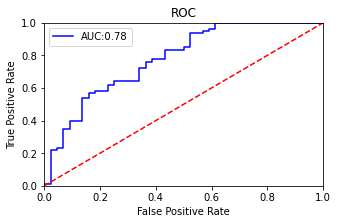

In [49]:
# Plot the ROC-AUC plot
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt
pred_prob = log_model.predict_log_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,pred_prob)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(5,3))
plt.title("ROC")
plt.plot(fpr,tpr,"b",label="AUC:{}".format(round(roc_auc,2)))
plt.legend(loc=2)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Lets apply the Logistic Regression Model with feature selection using Chi-Square Test of Independence.

In [50]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Y,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Y,Urban,Y


In [51]:
# Takes only Categorical variables and do encoding
df_dummy2 =  pd.get_dummies(df_loan1[cat_col],drop_first=True)

In [52]:
df_dummy2.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Y,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,0,0,0,1,0,0
1,1,1,0,0,0,0,1,1,0,1
2,1,1,0,0,0,1,0,1,0,1
3,1,0,0,0,0,0,0,1,0,1
4,1,1,0,1,0,0,1,1,0,1


In [53]:
df_dummy2 = pd.concat([df_dummy2,df_loan1["Loan_Status"]],axis=1)
df_dummy2.head()
df_dummy2["Loan_Status"] = df_dummy2["Loan_Status"].apply(lambda x:0 if x=="N" else 1)

In [54]:
df_dummy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Male              480 non-null    uint8
 1   Married_Yes              480 non-null    uint8
 2   Dependents_1             480 non-null    uint8
 3   Dependents_2             480 non-null    uint8
 4   Dependents_3+            480 non-null    uint8
 5   Education_Not Graduate   480 non-null    uint8
 6   Self_Employed_Yes        480 non-null    uint8
 7   Credit_History_Y         480 non-null    uint8
 8   Property_Area_Semiurban  480 non-null    uint8
 9   Property_Area_Urban      480 non-null    uint8
 10  Loan_Status              480 non-null    int64
dtypes: int64(1), uint8(10)
memory usage: 8.6 KB


In [55]:
X_dummy = df_dummy2.iloc[:,0:-1]
y_dummy = df_dummy2["Loan_Status"]

In [56]:
# Apply sklearn ch2
ch2c=SelectKBest(score_func=chi2,k=10)
ch2c.fit(X_dummy,y_dummy)
features_score_pvalue=pd.DataFrame({"Score":ch2c.scores_,"P_Value":np.round(ch2c.pvalues_,3)},index=X_dummy.columns)
features_score_pvalue.nlargest(n=10,columns="Score")

,Score,P_Value
Credit_History_Y,19.617746,0.000
Property_Area_Semiurban,7.004777,0.008
Married_Yes,2.132101,0.144
Dependents_2,2.126247,0.145
Education_Not Graduate,1.793838,0.180
Property_Area_Urban,1.033540,0.309
Dependents_1,0.651254,0.420
Self_Employed_Yes,0.498920,0.480
Gender_Male,0.357829,0.550
Dependents_3+,0.014685,0.904


In [57]:
features_score_pvalue = features_score_pvalue[features_score_pvalue["P_Value"]<0.50]
selected_cat_cols = features_score_pvalue.index.values.tolist()

In [58]:
selected_cat_cols

['Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Credit_History_Y',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [59]:
num_cols = df_loan1.select_dtypes(include=["float64","int64"]).columns.to_list()
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [60]:
selected_cols = selected_cat_cols + num_cols
#selected_cols = num_cols
#selected_cols = selected_cat_cols

In [61]:
selected_cols

['Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Credit_History_Y',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [62]:
df_dummy1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Y,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,0,1,1,1,0,0,0,0,1,0,0
1,3000,0.0,66.0,360.0,1,1,1,0,0,0,0,1,1,0,1
2,2583,2358.0,120.0,360.0,1,1,1,0,0,0,1,0,1,0,1
3,6000,0.0,141.0,360.0,1,1,0,0,0,0,0,0,1,0,1
4,5417,4196.0,267.0,360.0,1,1,1,0,1,0,0,1,1,0,1


In [63]:
# Lets 
X_select = df_dummy1[selected_cols]
y_select = df_dummy1["Loan_Status"]

In [64]:
# Split the dataset in train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,classification_report,accuracy_score
Xs_train,Xs_test,ys_train,ys_test = train_test_split(X_select,y_select,test_size = 0.3,random_state = 42)

In [65]:
## Apply Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(Xs_train,ys_train)

LogisticRegression()

In [66]:
pred_reg = log_reg.predict(Xs_test)
print("Accuracy_bae_model :",accuracy_score(ys_test,pred_reg))
print("Classification Report :")
print(classification_report(ys_test,pred_reg))

Accuracy_bae_model : 0.8055555555555556
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        44
           1       0.78      1.00      0.88       100

    accuracy                           0.81       144
   macro avg       0.89      0.68      0.71       144
weighted avg       0.85      0.81      0.77       144



# Dealing with Imbalance Datasets

In [1]:
#Up-Sampling
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [2]:
n_class_0,n_class_1

(900, 100)

In [3]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [4]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [5]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [6]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [7]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [21]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [22]:
df_minority_upsampled.shape

(900, 3)

In [23]:
df_minority_upsampled.head()

,feature_1,feature_2,target
957,1.364350,1.535966,1
959,0.666001,1.894732,1
967,2.549697,3.095922,1
958,0.342491,1.927940,1
981,2.408626,3.242017,1


In [24]:
df_minority_upsampled.tail()

,feature_1,feature_2,target
936,3.727988,3.468919,1
945,3.383491,2.725925,1
947,1.402209,2.775845,1
990,3.063905,0.919587,1
973,2.572843,1.274827,1


In [25]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [26]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [27]:
#Down Sampling
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [28]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [33]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [34]:
df_majority_downsampled.shape

(100, 3)

In [35]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [36]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [54]:
from sklearn.datasets import make_classification

In [55]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [56]:
X.shape

(1000, 2)

In [57]:
len(y[y==1])

100

In [58]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [59]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

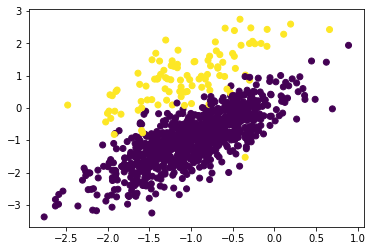

In [60]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [46]:
!pip install imblearn

In [61]:
from imblearn.over_sampling import SMOTE

In [64]:
##transforming the dataset

oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1',"f2"]],final_df['target'])

In [65]:
X.shape

(1800, 2)

In [66]:
y.shape

(1800,)

In [67]:
len(y[y==0])

900

In [68]:
len(y[y==1])

900

In [69]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

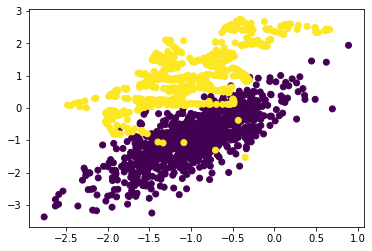

In [70]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

Data Interpolation

In [95]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

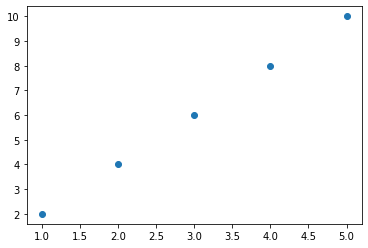

In [96]:
plt.scatter(x,y)

In [97]:
## interpolating the data using Linear Interpolation

x_new=np.linspace(1,5,10) #new values
y_interp=np.interp(x_new,x,y)

In [98]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

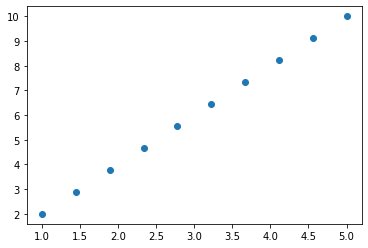

In [99]:
plt.scatter(x_new,y_interp)

In [100]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [101]:
from scipy.interpolate import interp1d

In [102]:
##create a cubic interpolation function
f=interp1d(x,y,kind='cubic')

In [103]:
# interpolate the data
x_new = np.linspace(1, 5, 10)
y_interp=f(x_new)

In [104]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

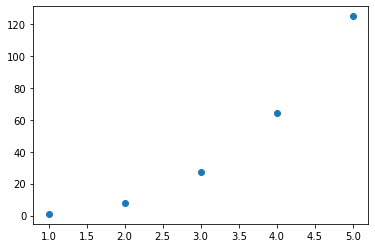

In [106]:
plt.scatter(x,y)

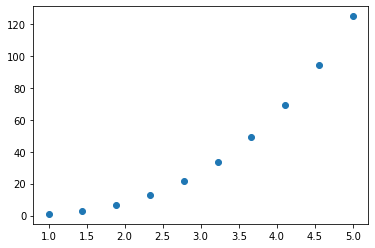

In [105]:
plt.scatter(x_new,y_interp)

In [107]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

In [108]:
# interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)

In [109]:
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.polyval(p, x_new) # interpolate y values

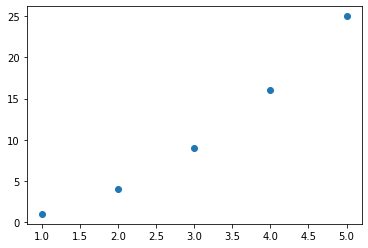

In [110]:
plt.scatter(x,y)

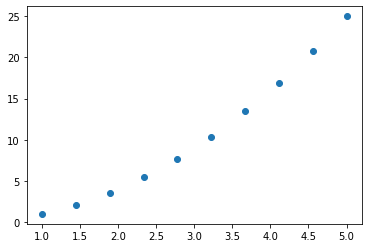

In [111]:
plt.scatter(x_new,y_interp)